In [ ]:
# Notebook adapted from Jeremy P. Howard

In [ ]:
%pwd

'/content'

## Task1

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

$Quadratic Function = \alpha+\beta x+\gamma x^2$

In [ ]:
def quadratic_function (alpha,beta,gamma,x):
  return alpha+beta*x+gamma*x**2

In [ ]:
beta_true = 6.0
alpha_true = 3.0
gamma_true=8.0
n = 30
x = random(n)
y = quadratic_function(alpha_true,beta_true, gamma_true, x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 6.
learning_rate = 0.01

**Find derivatives with respect to each parameter**

* The partial derivatives are


$\dfrac{\partial}{\partial \alpha}((y_i - (α + β x_i + γ x_i^2))^2) = -2 (-α - x_i (β + γ x_i) + y_i)$

$\dfrac{\partial}{\partial\beta}((y_i - (α + β x_i + γ x_i^2))^2) = -2 x (-α - x_i (β + γ x_i) + y_i) $

$\dfrac{\partial}{\partial\gamma}((y_i - (α + β x_i + γ x_i^2))^2) = -2 x^2 (-α - x_i (β + γ x_i) + y_i)$

\\

* The gradient of loss is

$\nabla L = (\dfrac{\partial L}{\partial \alpha} \dfrac{\partial L}{\partial \beta} \dfrac{\partial L}{\partial \gamma})$

$\nabla L(\alpha, \beta, \gamma) = (-\dfrac{2}{m} \Sigma_{i=1}^{m}(y_i-(\alpha + \beta x_i  + \gamma x_i^2)),-\dfrac{2}{m} \Sigma_{i=1}^{m}(x_i(y_i-(\alpha + \beta x_i  + \gamma x_i^2))), -\dfrac{2}{m} \Sigma_{i=1}^{m}(x_i^2(y_i-(\alpha + \beta x_i  + \gamma x_i^2))))$

$\nabla L(\alpha, \beta, \gamma) = (-\dfrac{2}{m} \Sigma_{i=1}^{m}(y_i - \hat{y_i}),-\dfrac{2}{m} \Sigma_{i=1}^{m}(x_i(y_i - \hat{y_i})), -\dfrac{2}{m} \Sigma_{i=1}^{m}(x_i^2(y_i - \hat{y_i})))$

---


**Update each parameter**


$\alpha ← \alpha - \eta \dfrac{\partial f}{\partial\alpha}$

$\beta ← \beta - \eta \dfrac{\partial f}{\partial\beta}$

$\gamma ← \gamma - \eta \dfrac{\partial f}{\partial\gamma}$

In [ ]:
def update_alpha_and_beta_and_gamma():
    global alpha, beta, gamma
    y_predicted =quadratic_function(alpha,beta,gamma,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y) #2 instead of -2 because it aims for the bottom instead of top
    derivative_of_loss_wrt_beta = x*derivative_of_loss_wrt_alpha
    derivative_of_loss_wrt_gamma = x**2*derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean() #subtract cuz going to the bottom of the convex
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate*derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = quadratic_function(alpha,beta,gamma,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta_and_gamma()
    return (line,)

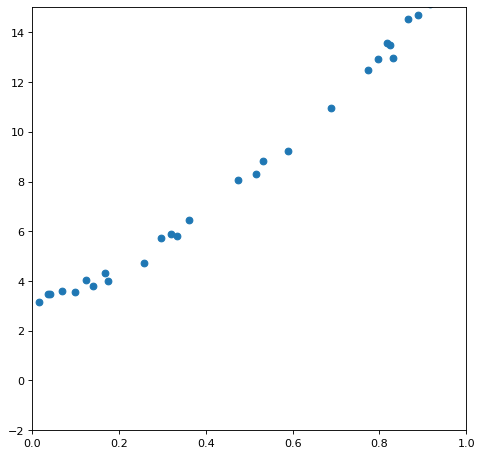

In [ ]:
fig = plt.figure(dpi=80, figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
# This comment just let Python remember the animation 

resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('resulting_animation.mp4', writer=writer)

In [ ]:
print('Done.')

Done.


## Task2